In [1]:
import pandas as pd
import nltk

In [2]:
dataset = "Twitter US Airline Sentiment dataset"

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(f'../Datasets/Raw/{dataset}/data.csv')

In [5]:
data.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
6026,568430198254747649,negative,0.6366,Late Flight,0.3237,Southwest,NaN,benamcswag,NaN,0,@SouthwestAir @thirty_lives birthday is the 24...,NaN,2015-02-19 07:21:34 -0800,NaN,Eastern Time (US & Canada)
8640,568091845848231937,positive,1.0000,NaN,NaN,Delta,NaN,JDesca01,NaN,0,@JetBlue Flight Booking Problems flights for a...,NaN,2015-02-18 08:57:05 -0800,Boston,Eastern Time (US & Canada)
2202,569318432648273920,negative,1.0000,Customer Service Issue,1.0000,United,NaN,jackiehoglund,NaN,0,@united trying to get a customer service agent...,NaN,2015-02-21 18:11:06 -0800,"Boston, MA",Quito
3369,568491094327078912,neutral,1.0000,NaN,NaN,United,NaN,CorettaBrowne,NaN,0,@united When will you have special promotions ...,NaN,2015-02-19 11:23:33 -0800,Greater New York Area,Central Time (US & Canada)
7203,569889846472409088,neutral,0.6598,NaN,0.0000,Delta,NaN,briantafel,NaN,0,@JetBlue ...and when did your legal department...,"[40.6467516, -73.77465033]",2015-02-23 08:01:42 -0800,"Brooklyn, NY",Eastern Time (US & Canada)


In [6]:
data.shape

(14640, 15)

In [7]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [10]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [11]:
data['TEXT'] = None

In [12]:
from Preprocessor import preprocess

[nltk_data] Downloading package punkt to /Users/devarajag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devarajag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/devarajag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
field = "text"

In [14]:
data = data.drop(columns=['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'])

In [15]:
data['CLASS']=None
for i in range(len(data[field])):
    if data['airline_sentiment'][i]=="neutral":
        data['CLASS'][i]=0
    elif data['airline_sentiment'][i]=="negative":
        data['CLASS'][i]=-1
    else:
        data['CLASS'][i]=1

In [16]:
data=data.drop(columns=['airline_sentiment'])

In [17]:
for i in range(len(data[field])):
    data['TEXT'][i] = preprocess(data[field][i])

In [18]:
data.sample(5)

,text,TEXT,CLASS
7639,"@JetBlue FLL to MDE, great flight, great cust...",jetblu fll mde great flight great custom servi...,1
4611,@SouthwestAir do these scavenger hunt locatio...,southwestair scaveng hunt locat anyth common p...,-1
5969,@SouthwestAir I can easily get to the Atlanta ...,southwestair easili get atlanta show need tick...,0
3276,@united I'll stick with my United flight. Than...,unit stick unit flight thank though effort muc...,1
12913,@AmericanAir instead they yelled at him and to...,americanair instead yell told call number pick...,-1


In [19]:
data.isna().sum()

text     0
TEXT     0
CLASS    0
dtype: int64

In [20]:
data=data.drop(columns=['text'])

In [21]:
data.nunique()

TEXT     14249
CLASS        3
dtype: int64

In [22]:
import os

target_directory = f'../datasets/Preprocessed/{dataset}'

os.makedirs(target_directory, exist_ok=True)

data.to_csv(os.path.join(target_directory, 'data.csv'))


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
!pip install wordcloud

In [25]:
from wordcloud import WordCloud

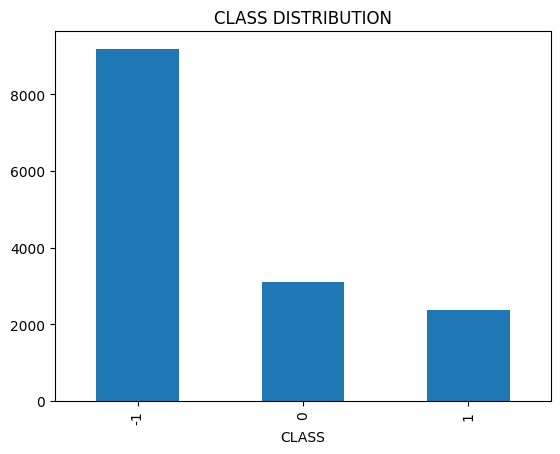

In [26]:
data.groupby('CLASS')['CLASS'].count().plot.bar()
plt.title('CLASS DISTRIBUTION')
plt.show()

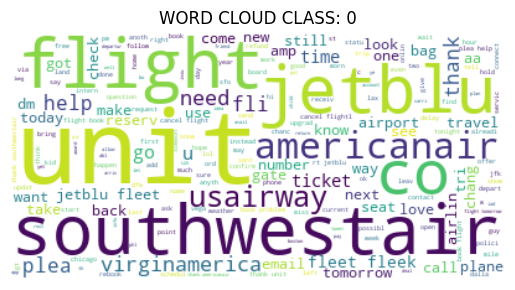

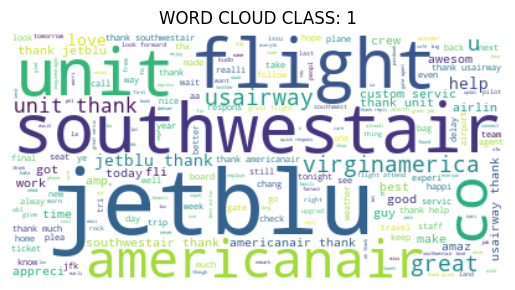

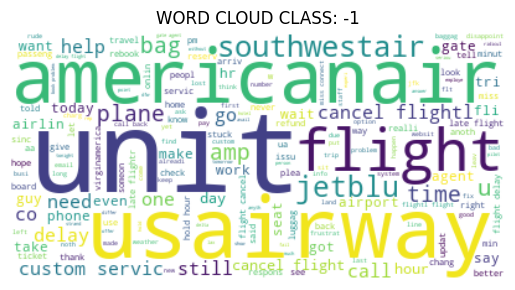

In [27]:
for value in data['CLASS'].unique():
    text = ' '.join(x for x in data[data['CLASS'] == value]['TEXT'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WORD CLOUD CLASS: {value}')
    plt.show()